## Blatt 05

### Aufgabe 13

#### a.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
#  spektraler Index vom Aufgabenblatt
gamma = 2.7 

#  Normierung des Neutrinoflusses
phi_0 = gamma - 1

def neutrinofluss(E, gamma):
    return phi_0 * (E)**(-gamma)

In [3]:
def neutrinofluss_trafo(gamma, u):
    return (1 - u)**(1 / (1 - gamma))

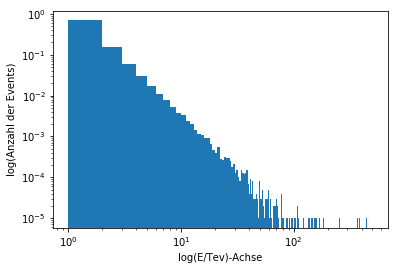

In [4]:
anzahl = int(1e5)
random_uniform = np.random.uniform(0, 1, anzahl)

df = pd.DataFrame({
    'Energy': neutrinofluss_trafo(gamma, random_uniform)
})

plt.hist(df.Energy, density=True, bins=np.linspace(1, 500, 500));
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(E/Tev)-Achse')
plt.ylabel('log(Anzahl der Events)')
plt.show()

### b.)
Detektionsakzeptanz mit Hilfe des Rükweisungsverfahren simulieren. 

In [5]:
#  Detektorakzeptanz
def Detektorakzeptanz(E):
    return (1 - np.exp(- E / 2))**3

In [6]:
#  Rückweisungsverfahren auf Detektordiskreptanz anwenden
acceptance = pd.DataFrame({
    'AcceptanceMask': np.flip(random_uniform) <= Detektorakzeptanz(df.Energy)
})

In [7]:
df = df.merge(acceptance, on=df.index)

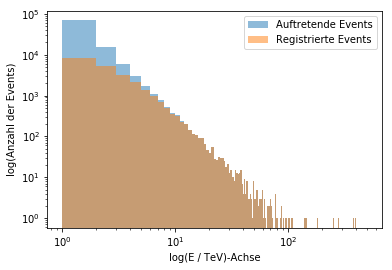

In [8]:
plt.hist(df.Energy, bins = np.linspace(1, 500, 500), alpha=0.5, label='Auftretende Events')
plt.hist(df.Energy[df.AcceptanceMask == True], bins=np.linspace(1, 500, 500),alpha=0.5, label='Registrierte Events')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(E / TeV)-Achse')
plt.ylabel('log(Anzahl der Events)')
plt.legend()
plt.show()

### c.)

In [9]:
mu = 10
std = 2

Anwenden der Polarmethode.

In [10]:
def Polarmethode(mu):    
    v_1 = np.random.uniform(-1, 1, 2*anzahl)
    v_2 = np.random.uniform(-1, 1, 2*anzahl)
    
        
    v_1_mod = v_1[v_1**2 + v_2**2<1]
    v_2_mod = v_2[v_1**2 + v_2**2<1]
    
    s = v_1_mod**2 + v_2_mod**2
    v_1 = (v_1_mod * np.sqrt(-2 / s * np.log(s)))[:anzahl]
    v_2 = (v_2_mod * np.sqrt(-2 / s * np.log(s)))[:anzahl]
    return v_1 + mu, v_2 + mu

In [11]:
x_1, x_2 = Polarmethode(mu)

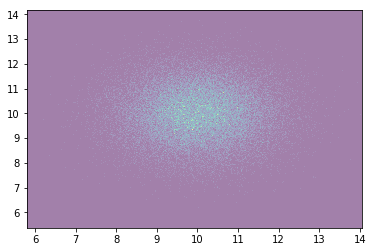

In [12]:
plt.hist2d(x_1, x_2, bins=500, alpha=0.5)
plt.show()

### Aufgabe 14

_Hauptkomponentenanalyse_ (PCA)

#### a.)

Datensätze mit `sklearn` erzeugen und darstellen.

In [13]:
from sklearn.datasets import make_blobs

In [14]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=4, random_state=0)

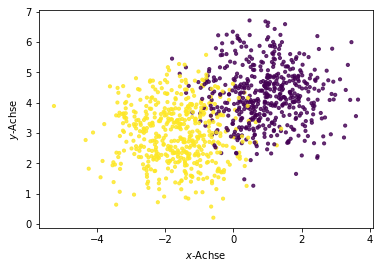

In [15]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=10, alpha=0.8)
plt.ylabel(r'$y$-Achse')
plt.xlabel(r'$x$-Achse')
plt.show()

#### b.)

Hauptkomponentenanalyse in eigenen Worten beschreiben und die Rechnenschritte schematisch darstelle.

__Motivation__

Die Hauptkomponentenanalyse (Principal component analysis `(PCA)`) wird verwendet um die Dimension eines höher dimensionalen Problemes zu verringern, da ein Datensatz aufgrund seiner hohen Dimensionalität ausdünnen kann.
Die PCA kann ebenfalls dazu verwendet werden einen Datensatz zu strukturieren, zu vereinfachen und zu veranschaulichen, indem eine Vielzahl statistischer Variablen durch eine geringere Zahl möglichst aussagekräftiger Linearkombination genähert wird.

__PCA- Verfahren__

_Vorraussetzungen:_ Gegeben seien $N$ Datenpunkte in einem $d$ dimensionalen Datensatz $\mathbf{X}$.
 
Die Datenmatrix soll nun mittels der PCA von $d$ Dimensionen auf $k < d$ Dimensionen transforiert werden.


1. Daten auf ihren Mittelwert zentrieren
2. Kovarianzmatrix von $\mathbf{X}$ berechnen
3. Eigenwerte und Eigenvektoren der Kovarianzmatrix berechnen
4. Die $k$ größten Eigenwerte und zugehörige Eigenvektoren auswählen
5. Bilde $d\times k$ Matrix $\mathbf{W}$ mit den $k$ Eigenvektorn als Spalten
6. Wende $\mathbf{W}$ auf jede Zeile aus $x \in \mathbf{X}$ an. $x' = \mathbf{W}^{\text{T}}\cdot x^{\text{T}}$

__1. _Zentrierung___

$\begin{align}
\vec{\mu} = \begin{pmatrix}
\overline{x_{1}} \\
\vdots \\
\overline{x_{d}}           
\end{pmatrix}, \text{ mit}\qquad \overline{x_{i}} = \frac{1}{N}\sum^N_{j = 0}x_i,j\\
\end{align}$

Die ursprünglichen Datenpunte $\tilde{x}_i$ werden ersetzt durch die zentrierten
Datenpunkte $x_i = \tilde{x}_i - \mu$ der Datenmatrix $\mathbf{X}$.

__2. _Kovarianz von___ $\mathbf{X}$ ___bestimmen___

Kovarianmatrix der Datenmatrix $\mathbf{X}$ bestimmen.
$$\text{Kovarianz: }\text{Cov}\left(\mathbf{X}\right)$$

__3. _Eigenwerte und Eigenvektoren___

Eigenwerte $\lambda_i$, mit $i = 1,\, ...\, , k$ und zugehörige Eigenvektoren $\vec{v}_i$, mit $i = 1,\, ...\, , k$ der Kovarianzmatrix $\text{Cov}\left(\mathbf{X}\right)$ bestimmen.

__4. _Sortieren der Eigenwerte___

Die Eigenwerte $\lambda_i$ werden ihrer Größe nach angeordnet, sodass gilt:
$$\lambda_1 > \lambda_2 > ... > \lambda_d$$

Dann werden die ersten $k$ Eigenwerte, mit zugehörigen Eigenvektoren ausgewählt.

__5. _Matrix___ $\mathbf{W}$ ___bilden___

Die Matrix $\mathbf{W}$ wird mit den ersten $k$ Eigenvektoren als Spalten gebildet.

$\begin{align}
\mathbf{W} = \begin{pmatrix}
\vec{v_{1,1}}, \,...\, ,\vec{v_{k, 1}} \\
\vdots\quad \vdots \quad \vdots\\
\vec{v_{1,k}}, \,...\, ,\vec{v_{k, k}}           
\end{pmatrix}, \text{ mit}\qquad \overline{x_{i}} = \frac{1}{N}\sum^N_{j = 0}x_i,j\\
\end{align}$

__6. _Datensatz transformieren___

Der transformierte Datensatz $\mathbf{X}'$ ergibt sich aus der folgenden Transformation.
$$\mathbf{X}' = \mathbf{X}\mathbf{W}$$

#### c.)
PCA Methode auf Datensatz aus Aufgabenteil `a.)` anwenden.

Darüberhinaus werden die Eigenwerte der Kovarianzmatrix bestimmt.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_transformed = pca.fit_transform(x)
eigenvalues = pca.explained_variance_

print(f'Die Eigenwerte der Kovarianzmatrix des erzeugten Datensatzes sind: {eigenvalues}')

Die Eigenwerte der Kovarianzmatrix des erzeugten Datensatzes sind: [17.51933024  0.99958442]


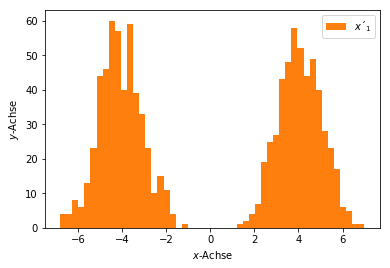

In [17]:
plt.hist(x_transformed[:, 0], bins=50, color='C1', label=r'$x´_1$')
plt.ylabel(r'$y$-Achse')
plt.xlabel(r'$x$-Achse')
plt.legend()
plt.show()

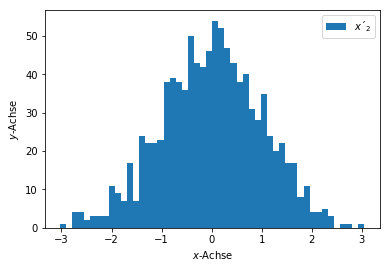

In [18]:
plt.hist(x_transformed[:, 1], bins=50, color='C0', label=r'$x´_2$')
plt.ylabel(r'$y$-Achse')
plt.xlabel(r'$x$-Achse')
plt.legend()
plt.show()

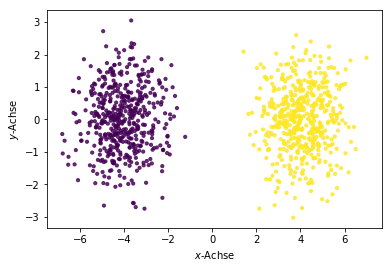

In [19]:
plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, s=10, alpha=0.8)
plt.ylabel(r'$y$-Achse')
plt.xlabel(r'$x$-Achse')
plt.show()